# Introduction

*Note: All of the code associated with this project can be found on my GitHub repository located [here](https://github.com/SeanAmmirati/stats-works/blob/master/projects/Factor%20Analysis%20-%20Case%20Study/factor_analysis.R).*

What are the core factors of human personality? 

It's a hard question to answer!

Data doesn't give us a direct answer to this question -- we may, using some sort of **model**, be able to determine how individuals are clustered into groups based on their responses to surveys. This is an example of **unsupervised learning**. 

We can use this information to cluser similar people together, and infer that they have similar personalities based on this. 

However, what we really want to know when we answer this question may be things that data cannot tell us. For example, what kinds of questions pertain to aggression? Introversion? Reliability? 

We can determine clusters of similar behaviors -- for instance, the answer to the questions "Do you enjoy parties?" and "Do you have a large social network?" will likely be **correlated**, so we may believe that these are influenced by some **factor** called extroversion. 

Most of the time, however, we do not model these explicitly -- we only wish to cluster individuals together, to make predictions of some measure (say, a happiness score), or make inferences about the questions themselves. For instance, people who answered question A and B in a certain way are likely to be similar to others **in their responses to questions.** 

This distinction is important -- we can speculate that there is some unknown factor involved, but it is not necessarily the case. 

In clustering algorithms like K-Means, SVD, LDA and Gaussian Mixture Models, we do not concern ourselves with what the actual underlying factors actually are -- we only use them as a way to categorize the data in order to make inferences or to predict another variable of interest.

We can see that these approaches are **data-driven**. We assume that the data contains relevant information by which we can group people together. 

But does this truly answer the question we wish to solve? In most cases, the answer is no, at least not explicitly. 

**Factor Analysis** attempts to model these underlying constructs explicitly. In this way, it is **hypothesis driven**, i.e., we model for the hypothesis we wish to verify or reject. 

Hypothesis testing is a common exercise in Statistics, but in this case our hypothesis is quite specific -- we hyptohesize that there are some unknown, unseen, unobservable *factors* underlying the patterns we see. 

It is for this reason that is particularly controversial -- who is to say that such factors even exist, and if they do, how can we categorize them in abstract terms? This is an open ended question -- but factor analysis can begin to give us a sense of how these factors may interact.  

Here's the objective : from our concrete features, we wish to derive information about unknown, and generally unknowable, **latent** variables. 

Let's dive in!
***

## Overview

Factor analysis is similar to **principal components analysis** in that we are working only with a single group of variables (in this case, the response) and we wish to in some way reduce the number of variables in order to simplify our data. This gives us a sense of what the underlying nature of the data is, and how it is organized. 
  
In factor analysis, we wish to reduce the redundancy of the variables by limiting them to a smaller number of **factors** which can adequately explain the variation in the full set of variables.

Factor analysis is considered somewhat controversial by statisticians and is not encouraged by all schools of thought. This is because factor analysis is often difficult to validate in practice, as the number of factors or the interpretations are not always clear from the analysis itself.

Although at first glance factor analysis and principal component analysis may seem very similar, there are key differences which separate the two methods. 

1. In principal component analysis we aim to maximize the **total variance** of the variables in question, but in factor analysis we wish to account for the **covariance between the variables.**  

2. While principal components analysis uses linear combinations of the variables themselves, in factor analysis we create a linear combination of **factors**, which are unobserved, supposed latent variables.

The factors that we are looking at are often some underlying attributes of the variables that we believe to be "seperate" in some way. 

For instance, let's say there we have students' test scores for different classes: physics, chemistry, statistics, English, history, etc. We may expect that there would be some underlying factors that would affect an individual's ability to perform well in these classes. 

Perhaps this would be something like quantitative reasoning skills, critical thinking ability, or reading level and skill. We wish to reduce the variables to a smaller subset that can use these factors (which are not observed but can be derived from the data using factor analysis) to simplify our dataset. We would then use factor analysis to determine both the "correct" number of factors and the effects these factors have on each of the variables.

It is quite easy to see how in practice this could be quite difficult to implement. This contributes to the skepticism of some statisticians to its use in the first place. Often times, the data doesn't easily lend itself to such a simplistic interpretation, and it is unclear what these factors can be and how they should be interpreted.

***

# The Model

Our model is constructed as follows: For each observation vector of $p$ variables, we have

$$
y_1 - \mu_1 = \lambda_{1 1}f_1 + \lambda_{1 2}f_2 + ... + \lambda_{1 m}f_m + \epsilon_1 \\
y_2 - \mu_2 = \lambda_{2 1}f_1 + \lambda_{2 2}f_2 + ... + \lambda_{2 m}f_m + \epsilon_2 \\
... \\
y_p - \mu_p = \lambda_{p 1}f_1 + \lambda_{p 2}f_2 + ... + \lambda_{p m}f_m + \epsilon_p
$$

On the left side of the equations, $y_1, ..., y_p$ are the variables in the dataset, and $\mu_1, ..., \mu_p$ are the corresponding means of these variables. We do this in order to center the variables.

On the right side of the equations,  $\lambda_{i j}$ are the **loadings** for the $ith$ variable and $jth$ factor, $f_1, f_2, ..., f_m$ are the $m$ factors, and $\epsilon_1, \epsilon_2, ..., \epsilon_p$ are the $p$ error terms associated with each variable.

Our goal in doing factor analysis is to find some $m << p$ such that the factors specified above are appropriate for the $p$ variables of interest.

In doing this, we are defining the original $p$ variables into a linear combination of $m$ factors. The $f$s in the above model are the $m$ factors themselves, while the lambdas are the loadings, which serve as weights for each factor for each of the $p$ variables.

While this may seem similar to a more typical **multiple regression model**, there are key differences.

Perhaps the most important thing to note here is that the $fs$ are unobserved random variables, not fixed effects like in multiple regression. Factor analysis only represents one observation vector, while multiple regression represents all of the observations simultaneously -- in this way, factor analysis is looking more to *individual* variation as opposed to *aggregate* or population level aggregation.

Our model can be written more simply in matrix notation as:

$$
\vec{y} - \vec{\mu} = \Lambda\vec{f} + \vec{\epsilon}
$$
where
$$
\vec{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_p \end{bmatrix} \\
\vec{\mu} = \begin{bmatrix} \mu_1 \\ \mu_2 \\ \vdots \\ \mu_p \end{bmatrix} \\
\vec{f} = \begin{bmatrix} f_1 \\ f_2 \\ \vdots \\ f_m \end{bmatrix} \\
\vec{\epsilon} = \begin{bmatrix} \epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_p \end{bmatrix} \\
\Lambda = \begin{bmatrix} \lambda_{1 1}  ... \lambda_{1 m} \\
                          \vdots       \ddots\vdots         \\
                          \lambda_{p 1} ... \lambda_{p m}
          \end{bmatrix}
$$



**Assumptions**: In performing factor analysis, we assume that the following holds:

1. $\mathbb{E}[\vec{f}] = \vec{0}$

2. $\Sigma_{\vec{f}} = I_{mxm}$

3. $\mathbb{E}[\vec{\epsilon}] = \vec{0}$

4. $\Sigma_{\vec{\epsilon}} = \Phi_{mxm} \text{, where } \Phi{pxp} = \begin{pmatrix} \sigma^2_{\epsilon_1}  & 0 & \dots & 0 \\ 0 & \sigma^2_{\epsilon_2}  & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & \sigma^2_{\epsilon_p} \end{pmatrix}$
5. $\Sigma_{\vec{f}, \vec{\epsilon}} = 0_{mxm}$

*Notationally, I mean $\Sigma_{\vec{X}}$ to be the square covariance matrix of a vector $\vec{X}$ with itself, where the $i, j$th element is the covariance of the $i$th entry in $\vec{X}$  with the $j$th entry. It is therefore a **positive semi-definite symmetric** matrix with variances in the diagonal.*

*I mean $\Sigma_{\vec{X}, \vec{Y}}$ to be the covariances of each element in $\vec{X}$  with each element in $\vec{Y}$. This is not a square matrix, but relates the covariance of the individual elements of the two vectors.*

  These assumptions follow naturally from the model itself. For instance, as $\mathbb{E}[\vec{y} - \vec{\mu}] = \vec{0}$, it follows that both episilon and the factors themselves must also have an expected value of zero. We assume that the factors are uncorrelated, as we wish to minimize the number of variables used (so, we wish to have no correlation between the factors themselves.)

  The $\Phi$ matrix shows that there are no covariance between the errors, only a *specific variance* for each error term, meaning the factors account for the correlations amongst the $y$s. This is exactly the goal of factor analysis, so these assumptions are self-checking -- if in recreating the model it is not clear what the factors should be or what number of them there should be, it is saying that these assumptions have not been met.

  In achieving our goal in factor analysis of reducing the variables used, we wish to express the covariance of $\vec{y}$ in terms of the loadings $\Lambda$ and the variances of the errors, $Phi$ using some number of factors $m$ which is less than the original number of variables $p.$

  We can show that the population covariance matrix $\Sigma_{\vec{y}-\vec{\mu}}$ can be written as follows:
  $$ \Sigma_{\vec{y}-\vec{\mu}} = \Lambda \Lambda{'} + \Phi$$
This follows from assumption 2 and 5 above. We can see then that the variance in this case will be a combination of some *signal* -- or explained -- variance in the latent variable loadings, and some *random* or unexplained variance in the error terms. 

This seperates Factor analysis from Principle Component Analysis -- in PCA, we make no distinction between explained and unexplained variance except in terms of the number of components selected. Here, we make this distinction for a number of latent variables.

It is also of note that we can rotate the loadings by an orthogonal matrix without effecting their ability to reproduce this population covariance matrix. As such the loadings are not unique. 

We will use these rotations when we perform our analysis. The rotations prove useful as the results given in the loadings may not make it clear which variables are effected by which factors. By rotating the coordinate axis, we can more easily interpret the results from the factor analysis.

The variances of each of the individual $y$s can be written as follows:
$$
Var[y_i] = h^2_i + \phi_i
$$
where $h_i^2 = \lambda_{i 1}^2 + \lambda_{i 2}^2 + ... + \lambda_{i m}^2$ and $\phi_i$ is the *specific variance* for the ith error term, that is, the ith diagonal of $\Phi$. Thus we can separate the variance of each of the $y$s into a communal and specific part, which is $h_i^2$ and $\phi_i$ respectively. As such, the diagonal elements can be easily estimated using the loadings and the specific variance, while the off diagonal elements depend on the selection of the loadings alone. Since factor analysis is largely dealing with the estimations of the loadings, it accounts for the covariations between the variables, rather than the total variance as in principal component analysis.

There are four different methods to obtain the loadings $\Lambda$ from a sample. These are the principal component method, the principal factor method, the iterated principal factor method, and the maximum likelihood method. These will be explored later in the coding.

Another difficulty is determining the number of factors, $m$. There are four approaches: we can select the number of variables $m$ which accounts for a prespecified amount of variance of the variables, we can choose $m$ to be the number of eigenvalues of the correlation matrix $R$ which is greater than the average of the eigenvalues, we can use a scree plot to determine where there is a leveling of the eigenvalues of $R$, or we can test the hypothesis using a chi-squared distribution if the number of factors is the true number of factors. Again, this will be shown further in the coding.

***

# Data

  The dataset I will be using to illustrate the benefits and limitations of factor analysis is collected data from an online personality questionnaire. The link can be found [here](http://personality-testing.info/_rawdata/AS+SC+AD+DO.zip).

  In this study, 1,005 participants were prompted with 40 statements to rate on a scale of one to five. This scale is used frequently and is known as the likert scale. It ranges from 1 (strongly disagree) to 5 (strongly agree). The data was partitioned into four sections, with every ten statements designed to be related to some attributes of the population; in particular, it was looking for their assertiveness, social confidence, adventurousness, and dominance. The questions were designed to discover the prevalence of these attributes through the responses to the statements in the survey.

  This seems like an ideal dataset to use factor analysis on, because the goal of the dataset seems to be precisely what factor analysis is used for. That is, we have some variables (the questions) that have some underlying, unobservable factor (initially hypothesized to be assertiveness, social confidence, adventurousness and dominance) that ties them all together. We are not very interested in the individual answers to the questions themselves, but of the behavior of the underlying factors that exist which are unobservable.

  Some examples of questions are printed below:

  <b>AS2</b> I try to lead others.

  **SC4** I express myself easily.

  **AD6** I dislike changes.

  **DO8** I challenge others' points of view.

  By looking at the coding markers of each of the questions, we can get a sense of how this survey was distributed and why. If, after doing factor analysis, there are four factors (that is, $m = 4$) and these factors are inclusive of each of the ten questions, we can then say that the data reflects these attributes well.

  Therefore, the goal of this analysis is to see

  1. if the data supports the idea that these factors are well separated in the variables,
  and
  2. if not, is there a better set of factors that can describe the individual more effectively.
  
  
  After doing some research, it seems that many personality scales fail to truly describe individuals completely. A very popular scale, the Myers Briggs Type Indicator (MBTI), has been purported by many to effectively separate all personalities into one of sixteen types. However, when researchers used factor analysis on data testing for the four underling dimensions of the Myers Briggs tests, they found conflicting results. One of these analyses confirmed the four-dimensionality of the data, while the other suggested there to be six, rather than the four purported by the Myers Briggs test.The motivation for choosing this topic and subsequent dataset was to test these findings for myself. Although I was unable to find an adequate dataset with questions relating to the Myers Briggs tests, I used this dataset to see how well factor analysis can truly separate personality types from a series of related statements.

  
***

# Analysis

In [7]:
require(psych)

tmp <- tempfile()
download.file("http://personality-testing.info/_rawdata/AS+SC+AD+DO.zip", tmp)
data <- read.csv(unz(tmp, 'AS+SC+AD+DO/data.csv'))
unlink(tmp)

data <- data[,1:40]
data[1:5, c(1, 11, 21, 31)]

R <- cor(data)

Loading required package: psych
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”

AS1,SC1,AD1,DO1
4,5,5,1
4,4,2,4
5,4,4,4
4,2,4,3
4,2,4,4


In [5]:
round(R, 2)[1:5,1:5]

,AS1,AS2,AS3,AS4,AS5
AS1,1.00,0.41,0.37,0.44,0.32
AS2,0.41,1.00,0.63,0.42,0.45
AS3,0.37,0.63,1.00,0.38,0.49
AS4,0.44,0.42,0.38,1.00,0.30
AS5,0.32,0.45,0.49,0.30,1.00


I begin by importing the dataset and only using the variables pertaining to the questions. The next step is to find the correlation matrix. This is the preferred matrix to work with, as it makes many of the computations easier to do (as compared with the covariance matrix itself). We can see immediately that this is a covariance matrix, as there are ones in the diagonal. However, it does not appear to have particularly strong or easily discernible groups of correlations between the variables, which implies that factor analysis may not perform as well as we had hoped.

I did not produce the entire matrix, as it is a 40x40 matrix. Instead, I only look at the first five rows and columns for illustrative purposes.

There were forty questions on the questionaire, with every ten representing a "factor" of one's personality. We are using factor analysis to  determine whether there is statistical evidence that these groupings represent latent 'factors'.

### Selecting $m$

As mentioned before, it often is not clear how many factors, $m$, we should use in the factor analysis. In this example, it would be preferable to use four, as that is how the data is designed. However, as we will see, four factors are not sufficient to separate the variables.

In order to perform factor analysis, we must find the correlation matrix of the dataset. This makes many of the calculations quite simple.

The next step will be determining how many factors we should use.

In [108]:
R <- cor(data)


Once we have the correlation matrix, the eigenvalues will tell us the optimal number of ways to reduce the features.



In [17]:
head(round(eigen(R)$values, 2), 15)

[1] 9.21 4.25 2.71 2.12 1.59 1.40 1.25 1.07 0.98 0.93 0.88 0.81 0.79 0.77 0.73

There are numerous methods to select the number of eigenvectors/eigenvalues we want to include. Each eigenvalue represents the proportion of variance explained by that eigenvector (a linear combination of the variables). We want to select eigenvectors/values such that we can explain a good deal of the variance with a smaller number of linear combinations of the features.

The first method involves choosing an arbitrary threshold. In this example, at 19 latent variables (that is, reducing the forty variables nearly in half) we have acheieved a threshold of variance explained greater than 60%.



In [110]:
sum(eigen(R)$values[1:19])/40 ##choose 19

[1] 0.8018384

Another method is to select eigenvectors such that each corresponding eigenvalue is greater than one. This means that the eigenvector of variables contributes more to the variance of the features than any single feature alone. Using this method, we come up with 8 linear combinations.


In [111]:
sum(eigen(R)$values > 1) ##choose 8

[1] 8

The final methodology is using a scree plot and determining where the eigenvalues level off. This is at 9 linear combinations of the features.



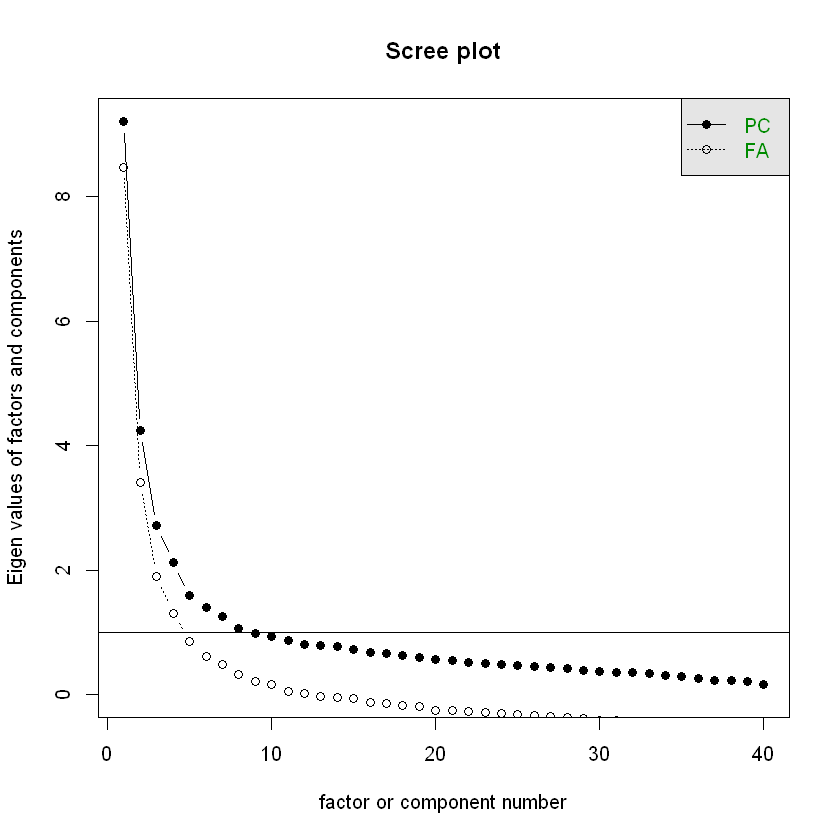

Parallel analysis suggests that the number of factors =  9  and the number of components =  7 


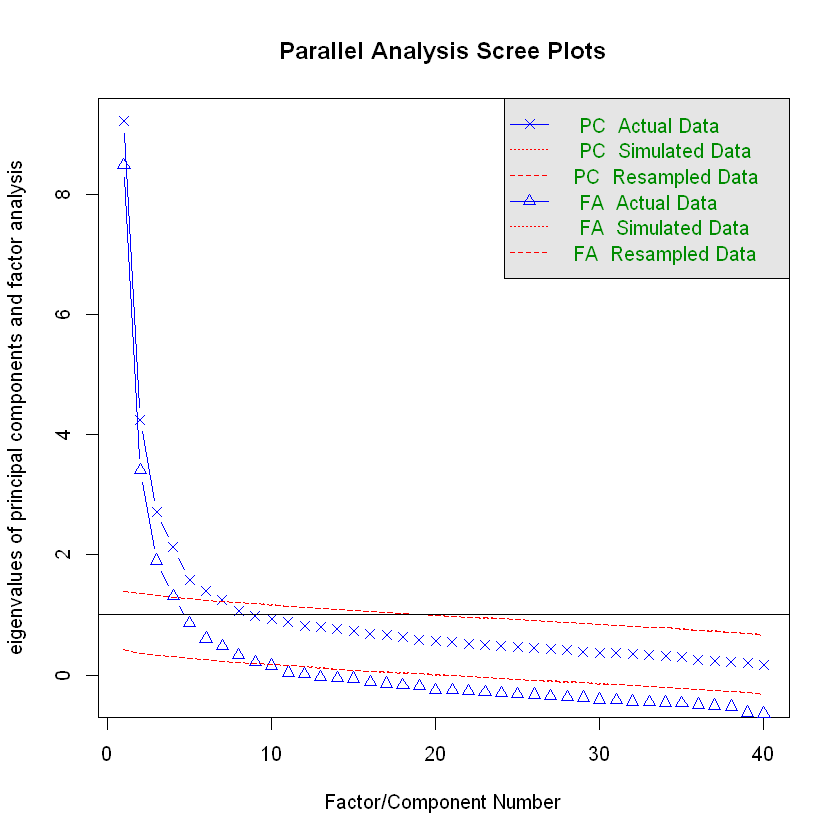

In [112]:
scree(R)##choose 9
fa.parallel(data)

Three different methods were explored to determine the amount of factors, $m$, to use. Unfortunately, it seems right from the beginning that four factors will not be enough to adequately describe the variables. The three methods provide very different numbers: 19, 8 and 9. I will use 9, as it appears to be a middle ground between the two, and the scree plot does flatten out significantly. Also, we do not wish to use nearly half of the number of variables as factors! Even 9 factors is quite high.

This is where factor analysis and principle component analysis begin to differ. In PCA, we simply use the eigenvectors of the correlation matrix as variables, or 'principle components'. This does not account for the noise in the principle components themselves -- it is not trying to find any signal here.

Factor analysis considers that these components are representations of some latent variables, that which are the true 'signal' in the correlation matrix, while the remainder is noise. Factor analysis is controversial because it attempts to estimate this latency by approximating correlation matrices, as we saw above.

Now that we have determined m, the number of factors, we will aim to create the loadings matrix to estimate the covariance matrix, as explained above. There are four methods by which we can estimate the loadings matrices. The loadings matrix in each case will be a $p x m$ matrix, and will use the eigenvalues of the correlation matrix. The first method we will use is the principal components method.

### Principal Components Method

In [16]:
eigenvectors <- eigen(R)$vectors[,1:9]
loadings <- eigenvectors %*% (diag(1,nrow = 9)*(eigen(R)$values[1:9])^.5)
head(round(loadings, 2))

-0.63,-0.12,-0.33,-0.05,0.20,-0.26,-0.01,-0.11,-0.22
-0.66,0.13,-0.12,0.22,0.22,0.13,-0.25,0.00,0.07
-0.64,0.20,-0.06,0.23,0.24,0.11,-0.31,0.07,-0.01
-0.60,0.00,-0.25,0.03,0.20,-0.10,0.22,0.39,0.18
-0.56,0.08,0.04,0.09,0.32,0.10,-0.34,0.03,0.09
-0.56,0.20,0.02,0.13,0.30,0.07,-0.28,-0.07,0.09


We first determine the loadings by multiplying the first $m$ eigenvectors (in this case, 9) by the square roots of their corresponding eigenvalues. This produces the above matrix, a unsightly $40x9$ matrix. Each column corresponds to a different loading.

To determine the communalities and specific variances of the variables, we can square the entries in each of the rows of the loadings matrix. This will give us the $h^2_i$ vector, from which we can also determine the specific variances.


In [21]:
hisq <- apply(apply(loadings, 2, function(x) x^2), 1, sum)
psi <- rep(1,40) - hisq
                    
cbind(communalities=round(hisq, 3), specific=round(psi, 3))

communalities,specific
0.684,0.316
0.654,0.346
0.675,0.325
0.713,0.287
0.567,0.433
0.559,0.441
0.635,0.365
0.532,0.468
0.610,0.390
0.485,0.515


The above are the communalities and the specific variances of each of the variables.

To determine the amount of the total variance of which each loading contributes, we can divide the eigenvalues of $R$ by the number of variables, $p = 40$.

Thus, all nine factors account for about 60% of the variance of the variables. This is not very good, especially considering there were supposed to be only four underlying factors!

#### Rotating the Loadings

Because we have $m = 9$, I will use the varimax rotations from the psych package to rotate the loadings we have above. This will make it easier to see which variables correspond to the factors.

In [115]:
## varimax includes a print method which makes the loading distributions easier to see.
loadingsrot <- print(varimax(loadings)$loadings,cutoff = .3,sort = T)


Loadings:
      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]  
 [1,] -0.681                                                        
 [2,] -0.713                                                        
 [3,] -0.681                                                        
 [4,] -0.655                                                        
 [5,]  0.506                                                   0.486
 [6,]        -0.657                                                 
 [7,]        -0.742                                                 
 [8,]        -0.765                                                 
 [9,]        -0.616                                                 
[10,]        -0.642                                                 
[11,]        -0.623                                                 
[12,]        -0.685                                                 
[13,]        -0.698                                                 
[14,]                0.

We can see from the above that the factors do not separate so easily. The values of the loadings below .3 have been omitted to make it clearer what the underling relationships are. Although they do not separate cleanly into the four theorized factors, we can see that the first factor, for instance, largely is between the first and tenth variables (which was assertiveness), the second factor between the 30th and 40th variables (which was dominance). Similarly, the fifth factor is between the 20th and 30th variables (social confidence) and the third and factor is largely between the 30th and 40th variables (adventurousness). However, the split is not so simple as we assumed before the analysis, as the other factors show relationships between variables which are not in the same groups.

The second function simply sorts the variables by factor, so we can get a better sense of how they separate. We can see that towards the top there are larger values for the loading matrix, which indicates a stronger association with the factor. We can also see that the 6th-9th factors also have some large values, which means that their correlations cannot be ignored. This suggests that the initial separation into only four factors may have been overly simplistic.

### Principle Factors Method

In the previous method, we had ignored the structure of the specific variances. Now, using the principal factors method, we will take the $\Phi$ matrix into account.

We first make an initial estimate of the $h_i$s, and use this to account for the specific variances. Below I create a diagonal matrix which has the specific variances in each of the diagonal elements. We will then subtract this matrix from the covariance matrix, and use the new matrix to compute our loadings.

In [25]:
hinit <- 1 - 1/diag(solve(R))
psiint <- 1 - hinit
cbind(communalities=round(hinit, 3), specific=round(psiint, 3))

,communalities,specific
AS1,0.703,0.297
AS2,0.548,0.452
AS3,0.551,0.449
AS4,0.505,0.495
AS5,0.391,0.609
AS6,0.418,0.582
AS7,0.479,0.521
AS8,0.327,0.673
AS9,0.268,0.732
AS10,0.219,0.781


In [27]:
New <- R - diag(psiint,nrow = 40)
eigs <- eigen(New)
head(round(eigs$values, 2))
round(eigs$vectors, 3)[1:5, 1:5]

[1] 8.72 3.73 2.22 1.56 1.13 0.95

-0.212,0.064,0.217,-0.022,-0.256
-0.219,-0.065,0.061,0.177,-0.133
-0.211,-0.098,0.024,0.184,-0.150
-0.199,0.000,0.147,0.036,-0.166
-0.183,-0.036,-0.032,0.068,-0.188


We will then use this new matrix to compute our eigenvalues and vectors, and subsequently create our new loadings matrix. In a similar way, we will determine the specific variances and communalities, and then rotate the loadings matrix.



In [28]:
eigenvectors2 <- eigen(New)$vectors[,1:9]
loadings2 <- eigenvectors2 %*% (diag(1,nrow = 9)*(eigen(New)$values[1:9])^.5)
hisq2 <- apply(apply(loadings2, 2, function(x) x^2), 1, sum)
psi <- rep(1,40) - hisq
loadings2rot <- print(varimax(loadings2)$loadings,cutoff = .35)


Loadings:
      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]  
 [1,]                                                   0.713       
 [2,] -0.635                                                        
 [3,] -0.662                                                        
 [4,]                                           -0.574              
 [5,] -0.549                                                        
 [6,] -0.554                                                        
 [7,]  0.500                                                        
 [8,]                                                               
 [9,]                                                          0.368
[10,]                                                               
[11,]                              0.636                            
[12,]                              0.729                            
[13,]                              0.460                            
[14,]                  

We can see a similar pattern to that of the principal component method above. The variance is not as well explained using this method, but when we perform the next step (using iterations of the above method), it will become a better representation of the data. Again, we can see similar relationships between the first five factors and the variables, but it is not all encompassing.

### Principal Factors Method

We will now use a similar method to above, but iterate it each time and update it with the new initial squared loadings. That is, when we calculate the new $h^2_i$ values, we do the iterate until it converges. For completeness, I perform the process 100 times below.

In [30]:
hinit2 <- 1 - 1/diag(solve(R))
for (i in 1:100) {
  New2 <- R - diag((1 - hinit2),nrow = 40)
  eigenvectors3 <- eigen(New2)$vectors[,1:9]
  loadings3 <- eigenvectors3 %*% (diag(1,nrow = 9)*(eigen(New2)$values[1:9])^.5)
  hinit2 <- apply(apply(loadings3, 2, function(x) x^2), 1, sum)
}
hisq3 = hinit2
round(loadings3, 3)[1:5, 1:5]

-0.634,0.130,0.342,-0.038,-0.299
-0.650,-0.126,0.095,0.225,-0.120
-0.629,-0.191,0.040,0.241,-0.147
-0.591,0.003,0.226,0.040,-0.169
-0.540,-0.070,-0.047,0.089,-0.185


In [32]:
head(round(hisq3, 3))                     

[1] 0.829 0.602 0.638 0.568 0.430 0.454

In [35]:
loadings3rot <- print(varimax(loadings3)$loadings, cutoff=.3)


Loadings:
      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]  
 [1,]                              0.328                0.771       
 [2,] -0.639                                                        
 [3,] -0.688 -0.300                                                 
 [4,]                                            0.593              
 [5,] -0.551                                                        
 [6,] -0.555                                                        
 [7,]  0.487                                                  -0.362
 [8,]                                                         -0.357
 [9,]                                                         -0.376
[10,]                                                         -0.326
[11,]                              0.605                            
[12,]                              0.755                            
[13,]                              0.463                            
[14,]                  

Again, we can see a similar pattern to the two above methods. The iterated method also created loadings which are closer to the principal component method. There are a few differences; for instance, in the iterated method we see that the third variable is part of both the 1st and 2nd factor, which wasnâ€™t present in the principal component method nor the principal factor method. Still, the analysis from before holds: much of the expected separation is contained in the factors (or some combination of them), but there are other correlations which those four factors cannot account for.

I will use the rotated matrix above to make some considerations about the level of effectiveness of the analysis. We know that the main goal of factor analysis is to acquire factors for which each variable can be loaded into only one factor. If we can do this, we have essentially reached our goal â€“ we have separated the variables completely into a smaller number of factors which accounts for the covariates between them.

However, in practice, this is very difficult to achieve. In the loading matrix above, there are many instance where the variables correlate strongly with more than one factor at once -- that is there is no clear distinction between what these questions relate to in terms of our factors. This indicates that factor analysis is not doing a very good job at separating the factors with the number of factors we have used.

# Some Considerations

In an ideal situation, we would use a very small value of $m$ relative to the amount of variables $p$. Although $m = 9$ performed decently well, it is quite a large number of factors. Even with nine factors, we see that the factor analysis was only able to account for around 60% of the covariation of the original variables. A fundamental issue with factor analysis is that the correlation matrix $R$ contains both structure and error, and factor analysis is not able to separate the two. Thus, the original assumptions of no relationships between the errors and the factors are too optimistic, as this rarely happens in practice.

As a result, the loadings above are quite difficult to interpret. It is difficult to say what the exact factors are in plain English. Here, we can see some of the difficulty in working with factor analysis in practice â€“ it is often questioned if these factors truly exist.

# Conclusions and Relation to Psychological Tests

In [37]:
print(varimax(loadings)$loadings, cutoff=.3)


Loadings:
      [,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]  
 [1,]                             -0.408                      -0.522
 [2,] -0.681                                                        
 [3,] -0.713                                                        
 [4,]                                            0.744              
 [5,] -0.681                                                        
 [6,] -0.655                                                        
 [7,]  0.506                                                   0.486
 [8,]                                                          0.578
 [9,]  0.302                                            0.681       
[10,]                                           -0.407  0.481       
[11,]                      -0.313 -0.728                            
[12,]                             -0.753                            
[13,]                             -0.478         0.355              
[14,]                  

We know that the original variables were constructed considering four groups (assertiveness, social confidence, adventurousness, and dominance). These were the intended characteristics that the statements were testing for. Above, we can see how factors 1-5 capture a lot of the variables in each set. So, we could say that factor 1 represents assertiveness, factor 2 represents dominance, factor 3 and 4 represent adventurousness, and factor 5 represents social confidence.

However, this would not be so accurate, as there are other factors to consider as well. We can see that factors 6-9 have members from all the different groups. This suggests that the relationship between the variables was not so simple as we once thought. Additionally, variable 10 failed to have a loading greater than .3 into any of the factors, which suggests that even 9 factors are inadequate to capture the variation in the data.

In this example, which seemed relatively straightforward, we see that problems emerged quite quickly. What, for instance, is factor six? And why are factors 3 and 4 separated? It is not so clear that our prior ideas about the factors are accurate.

One thing is clear, though. The four factors used to create the questionnaire are insufficient to truly describe the structure of the data. To say that these statements measure these factors would be jumping to conclusions too quickly. Doing so is, in a way, oversimplifying the data.

In conclusion, we have learned that this dataset cannot be so simply separated into the four purported factors. In fact, even separating the variables into 9 factors can only account for 60% of the variation of the variables. We can see that while factor analysis is a powerful technique, it is very dependent on the dataset which it is performed on. The self-checking property of the assumptions of factor analysis ensures that only models which fit the assumptions will produce results which separate the variables adequately to the different factors.
